# Example notebook to show how to load ephys data and link to stimulus audio

To keep file sizes managable, only spike time information is included in the main dataframe (loaded in from **load_spike_data()**). To incorporate other data such as stimulus alignment and spectrograms, you need to call other functions that read in the right data for the specific stimulus file (see below for example of **get_stimulus_timeseries()**). Other measures like the kde of the psth can be computed from this data (see example of **fit_kde()**).

Some of the functions that are used in this notebook include.

* load_spike_data()

* fit_kde()

* plot_raster()

* get_stimulus_timeseries()

* load_unit_waveforms()

Other functions that I haven't documented here include

* load_stim_data()

* load_ephys_stimulus()

And other functions I haven't even written or am in the process of incorporating into this repository

* computing a unit's coherence (for various subsets of stimuli)

* computing response strength

* computing unit selectivity

* computing STRFs

In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), "..", "code"))

from soundsig.sound import spectrogram, plot_spectrogram

import matplotlib.pyplot as plt

from analysis import fit_kde, get_stimulus_timeseries
from load_data import (
    load_spike_data,
    load_stim_data,
    load_ephys_stimulus,
    load_unit_waveforms
)
from plotting import plot_raster

%load_ext autoreload
%autoreload 2

## I. Load ephys data with the load_spike_data() function

All the data loading functions are found in `code/load_data.py`

In [2]:
ephys_data = load_spike_data()

In [3]:
ephys_data

,call_type,electrode,exposure,isi_histogram,isi_violation_pct,n_trials,relation,self,site,snr,spike_times,stim_duration,unit,unit_id,reward_class,stimulus_file,subject,date
0,dc,0,familiar,"([47, 308, 350, 241, 225, 275, 276, 254, 225, ...",0.002098,10,test,False,GreBla5671F_200117_123306,5.456417,"[[-0.9643999999999977, -0.9173666666666662, -0...",3.0,0,e0u0sGreBla5671F_200117_123306,Rewarded,DC_Stim_1_BluRas07dd_423.wav,GreBla5671F,2020-01-17
1,dc,0,familiar,"([47, 308, 350, 241, 225, 275, 276, 254, 225, ...",0.002098,10,test,False,GreBla5671F_200117_123306,5.456417,"[[-0.9739000000000146, -0.4752333333333354, -0...",3.0,0,e0u0sGreBla5671F_200117_123306,Nonrewarded,DC_Stim_1_BluRas61dd_884.wav,GreBla5671F,2020-01-17
2,dc,0,familiar,"([47, 308, 350, 241, 225, 275, 276, 254, 225, ...",0.002098,10,test,False,GreBla5671F_200117_123306,5.456417,"[[-0.9202000000000083, -0.915300000000002, -0....",3.0,0,e0u0sGreBla5671F_200117_123306,Nonrewarded,DC_Stim_1_GraGra0201_142.wav,GreBla5671F,2020-01-17
3,dc,0,familiar,"([47, 308, 350, 241, 225, 275, 276, 254, 225, ...",0.002098,10,familiar,True,GreBla5671F_200117_123306,5.456417,"[[-0.9227333333333263, -0.8911999999999978, -0...",3.0,0,e0u0sGreBla5671F_200117_123306,None,DC_Stim_1_GreBla5671F_619_Familiar.wav,GreBla5671F,2020-01-17
4,dc,0,familiar,"([47, 308, 350, 241, 225, 275, 276, 254, 225, ...",0.002098,10,familiar,False,GreBla5671F_200117_123306,5.456417,"[[-0.9756666666666689, -0.8113000000000028, -0...",3.0,0,e0u0sGreBla5671F_200117_123306,None,DC_Stim_1_GreBla7410_199_Familiar.wav,GreBla5671F,2020-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,ripple,9,unfamiliar,"([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.000000,2,unfamiliar,False,WhiRed9510F_191220_181416,17.327589,"[[0.43640000000004875, 4.154266666666899], [0....",2.0,9,e9u9sWhiRed9510F_191220_181416,None,randripple5_fs30k.wav,WhiRed9510F,2019-12-20
54,ripple,9,unfamiliar,"([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.000000,3,unfamiliar,False,WhiRed9510F_191220_181416,17.327589,"[[4.692999999999984, 5.795233333333499], [3.50...",2.0,9,e9u9sWhiRed9510F_191220_181416,None,randripple6_fs30k.wav,WhiRed9510F,2019-12-20
55,ripple,9,unfamiliar,"([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.000000,4,unfamiliar,False,WhiRed9510F_191220_181416,17.327589,"[[3.5368666666663557], [5.784166666666351], [2...",2.0,9,e9u9sWhiRed9510F_191220_181416,None,randripple7_fs30k.wav,WhiRed9510F,2019-12-20
56,ripple,9,unfamiliar,"([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.000000,3,unfamiliar,False,WhiRed9510F_191220_181416,17.327589,"[[0.2056999999999789], [4.928733333333184, 5.1...",2.0,9,e9u9sWhiRed9510F_191220_181416,None,randripple8_fs30k.wav,WhiRed9510F,2019-12-20


The **load_spike_data** function loads up a dataframe with columns `unit_id` (an identifier for a unit containing the electrode, cluster number, and site) as well as by `stimulus_file` (the stimulus filename). These are the columns you are primarily going to be first filtering on I'm guessing.

### Dataframe columns

Each row of this dataframe contains spike timing information for trials of that unit responding to the given stimulus under the column `spike_times`. The times are in seconds relative to trial onset.

* spike_times

There are identifying columns describing the implanted subject and the unit (at some point to include depth and putative brain regions):

* `unit_id`
* subject
* site
* electrode
* unit

These columns describe the some summary statistics of the unit's response properties

* isi_histogram
* isi_violation_pct: the fraction of inter-spike intervals less than 1ms
* snr: the ratio of the max value of the mean spike waveform to the min value of the mean spike waveform

Finally, the following columns describe qualities of the stimulus file

* `stimulus_file`
* stim_duration
* call_type

And these describe the relation of the vocalizer played in the stimulus to the implanted subject and the subject's experience in the pecking test

* relation: out of (familiar, unfamiliar, test, self, ripple)
* exposure: similar to relation, but maps (test, self) -> familiar and ripple -> unfamiliar
* reward_class: Rewarded or Nonrewarded in the pecking test (None if not in pecking test)
* self: True if the vocalization was recorded from the implanted subject

## II. Querying by unit_id or by stimulus_file

3 examples of how to select data

In [4]:
# Get a single row using unit x stim
# Note: even though it returns one row, to get the row on its own you need to use row.iloc[0]
row = ephys_data.query("""
    unit_id == "e9u9sWhiRed9510F_191220_181416" and stimulus_file == "randripple5_fs30k.wav"
""")

In [5]:
row = row.iloc[0]
row

call_type                                                       ripple
electrode                                                            9
exposure                                                    unfamiliar
isi_histogram        ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
isi_violation_pct                                                    0
n_trials                                                             2
relation                                                    unfamiliar
self                                                             False
site                                         WhiRed9510F_191220_181416
snr                                                            17.3276
spike_times          [[0.43640000000004875, 4.154266666666899], [0....
stim_duration                                                        2
unit                                                                 9
unit_id                                 e9u9sWhiRed9510F_191220_181416
reward

In [6]:
# Get all responses for a single unit
unit_df = ephys_data.query("""
    unit_id == "e9u9sWhiRed9510F_191220_181416"
""")

In [7]:
unit_df.head()

,call_type,electrode,exposure,isi_histogram,isi_violation_pct,n_trials,relation,self,site,snr,spike_times,stim_duration,unit,unit_id,reward_class,stimulus_file,subject,date
0,dc,9,familiar,"([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.0,5,test,False,WhiRed9510F_191220_181416,17.327589,"[[5.514633333333222], [-0.9967000000001462, 3....",3.0,9,e9u9sWhiRed9510F_191220_181416,Nonrewarded,DC_Stim_1_BluRas07dd_423.wav,WhiRed9510F,2019-12-20
1,dc,9,familiar,"([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.0,4,test,False,WhiRed9510F_191220_181416,17.327589,"[[3.6993333333330156], [6.965200000000095], [4...",3.0,9,e9u9sWhiRed9510F_191220_181416,Rewarded,DC_Stim_1_BluRas61dd_884.wav,WhiRed9510F,2019-12-20
2,dc,9,familiar,"([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.0,4,test,False,WhiRed9510F_191220_181416,17.327589,"[[2.1894333333334544, 2.5582000000003973, 6.47...",3.0,9,e9u9sWhiRed9510F_191220_181416,Rewarded,DC_Stim_1_GraGra0201_142.wav,WhiRed9510F,2019-12-20
3,dc,9,familiar,"([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.0,4,familiar,False,WhiRed9510F_191220_181416,17.327589,"[[-0.29803333333347837, 2.379466666666758], [3...",3.0,9,e9u9sWhiRed9510F_191220_181416,None,DC_Stim_1_GreBla5671F_619_Familiar.wav,WhiRed9510F,2019-12-20
4,dc,9,familiar,"([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.0,5,familiar,False,WhiRed9510F_191220_181416,17.327589,"[[-0.5615999999999985], [0.46753333333344926, ...",3.0,9,e9u9sWhiRed9510F_191220_181416,None,DC_Stim_1_GreBla7410_199_Familiar.wav,WhiRed9510F,2019-12-20


In [8]:
# Get all units' responses to a specific stim
stim_df = ephys_data.query("""
    stimulus_file == "randripple5_fs30k.wav"
""")

In [9]:
stim_df

,call_type,electrode,exposure,isi_histogram,isi_violation_pct,n_trials,relation,self,site,snr,spike_times,stim_duration,unit,unit_id,reward_class,stimulus_file,subject,date
53,ripple,0,unfamiliar,"([47, 308, 350, 241, 225, 275, 276, 254, 225, ...",0.002098,10,unfamiliar,False,GreBla5671F_200117_123306,5.456417,"[[-0.49209999999999354, -0.4180333333333124, -...",2.0,0,e0u0sGreBla5671F_200117_123306,None,randripple5_fs30k.wav,GreBla5671F,2020-01-17
53,ripple,0,unfamiliar,"([5, 18, 27, 16, 18, 20, 30, 28, 27, 20, 28, 1...",0.000632,8,unfamiliar,False,GreBla7410M_200116_163016,4.814344,"[[-0.625533333333351, 0.2718666666666536, 0.32...",2.0,0,e0u0sGreBla7410M_200116_163016,None,randripple5_fs30k.wav,GreBla7410M,2020-01-16
53,ripple,0,unfamiliar,"([0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 4, 6, 7, 1, 7,...",0.000000,7,unfamiliar,False,GreBla5671F_200117_183229,9.388214,"[[0.5626333333333378, 4.361099999999965, 5.537...",2.0,10,e0u10sGreBla5671F_200117_183229,None,randripple5_fs30k.wav,GreBla5671F,2020-01-17
53,ripple,0,unfamiliar,"([4, 27, 76, 57, 39, 56, 53, 49, 55, 51, 45, 5...",0.000301,10,unfamiliar,False,GreBla7410M_200116_185726,4.717531,"[[0.12203333333334854, 0.23040000000000305, 0....",2.0,10,e0u10sGreBla7410M_200116_185726,None,randripple5_fs30k.wav,GreBla7410M,2020-01-16
53,ripple,0,unfamiliar,"([211, 53, 85, 87, 93, 85, 74, 48, 64, 55, 39,...",0.047813,2,unfamiliar,False,RedBla0907M_191219_080025,4.715161,"[[-0.6398666666664212, 0.45116666666672245, 1....",2.0,10,e0u10sRedBla0907M_191219_080025,None,randripple5_fs30k.wav,RedBla0907M,2019-12-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,ripple,9,unfamiliar,"([1, 3, 6, 36, 55, 55, 48, 49, 38, 29, 34, 33,...",0.000405,3,unfamiliar,False,GreBla7410M_200116_102111,11.167693,"[[0.053999999999973625, 1.2396666666666647, 1....",2.0,81,e9u81sGreBla7410M_200116_102111,None,randripple5_fs30k.wav,GreBla7410M,2020-01-16
53,ripple,9,unfamiliar,"([1, 17, 26, 27, 55, 84, 68, 63, 44, 55, 46, 4...",0.000275,3,unfamiliar,False,GreBla7410M_200116_102111,9.589969,"[[-0.9472000000000662, -0.9070666666666511, -0...",2.0,84,e9u84sGreBla7410M_200116_102111,None,randripple5_fs30k.wav,GreBla7410M,2020-01-16
53,ripple,9,unfamiliar,"([10, 28, 52, 77, 112, 148, 196, 206, 227, 272...",0.000526,10,unfamiliar,False,GreBla7410M_200116_102111,9.401112,"[[-0.6529666666666571, -0.6236333333333164, -0...",2.0,87,e9u87sGreBla7410M_200116_102111,None,randripple5_fs30k.wav,GreBla7410M,2020-01-16
53,ripple,9,unfamiliar,"([10949, 13701, 14352, 10576, 7844, 6654, 5251...",0.084881,0,unfamiliar,False,GreBla7410M_200116_102111,3.802495,[],2.0,88,e9u88sGreBla7410M_200116_102111,None,randripple5_fs30k.wav,GreBla7410M,2020-01-16


## III. Kernel Density Estimate PSTH

This is an example of computing a PSTHs of a particular unit to a stim. Lets pick one with a lot of trials and high snr just so we know we are okay. 



In [10]:
stim_df = ephys_data.query("""
    stimulus_file == "So_Stim_3_PeLBlaGre_526554_0.wav"
""")
row1 = stim_df.sort_values(["n_trials", "snr"], ascending=False).iloc[0]
row2 = stim_df.sort_values(["n_trials", "snr"], ascending=False).iloc[1]

In [11]:
def plot_kde_and_raster(row):
    """Plot the kde and raster for the selected unit"""
    
    display(row[["site", "electrode", "unit"]])
    
    t_arr, result = fit_kde(row["spike_times"], (-1.0, row["stim_duration"] + 1.0), return_rate=True)

    plt.plot(t_arr, result, color="Black")
    plot_raster(
        row["spike_times"],
        yrange=(0, -plt.ylim()[1]),
        ax=plt.gca(),
        marker=".",
        s=10,
        color="Black"
    )
    plt.ylabel("Firing Rate (Hz)")
    plt.vlines(0, *plt.ylim(), linestyle="--", color="Red")
    plt.xlabel("t (seconds)")

site         GreBla5671F_200117_172146
electrode                           11
unit                                 2
Name: 31, dtype: object

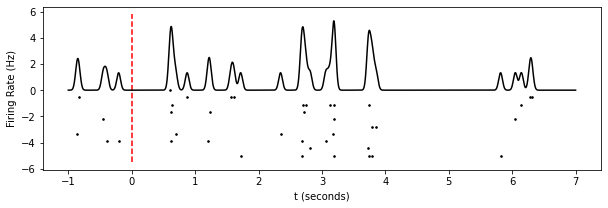

site         GreBla7410M_200116_174224
electrode                           27
unit                                25
Name: 31, dtype: object

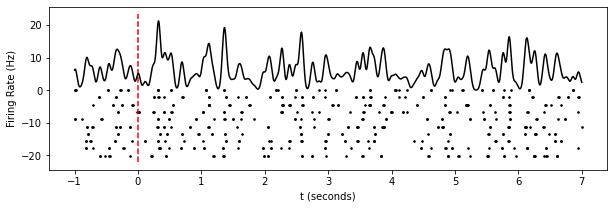

In [12]:
fig = plt.figure(figsize=(10, 3))
plot_kde_and_raster(row1)
plt.show()

fig = plt.figure(figsize=(10, 3))
plot_kde_and_raster(row2)
plt.show()

## IV. Align Stimulus Audio Data

To keep it easy to load the ephys, the stimulus file data is saved and loaded separately. It is simple to create an aligned stimulus array for the audio waveform or a spectrogram, using the function **get_stimulus_timeseries**.

You can pass it either just the string of the wav file name, or the row in the stimulus dataframe you got from `load_stim_data()`


In [13]:
def plot_audio_overlay(row):
    t_stim, stim = get_stimulus_timeseries(row["stimulus_file"], time_range=(-1.0, row["stim_duration"] + 1.0))
    plt.plot(t_stim, stim, alpha=0.2)
    plt.yticks([])
    
def plot_spectrogram_overlay(row):
    t_stim, stim = get_stimulus_timeseries(row["stimulus_file"], time_range=(-1.0, row["stim_duration"] + 1.0))
    
    # I need the sampling rate of the stim to compute the spectrogram. I could load it but ill just
    # figure it out from the time array
    fs = 1 / (t_stim[1] - t_stim[0])
    
    t_spec, f_spec, spec, _ = spectrogram(stim, fs, 1000, 50, cmplx=False)
    t_spec += t_stim[0]  # Offset the spectrograms default time axis (which starts at 1) with our own time range
    
    plot_spectrogram(t_spec, f_spec, spec, ax=plt.gca())

site         GreBla5671F_200117_172146
electrode                           11
unit                                 2
Name: 31, dtype: object

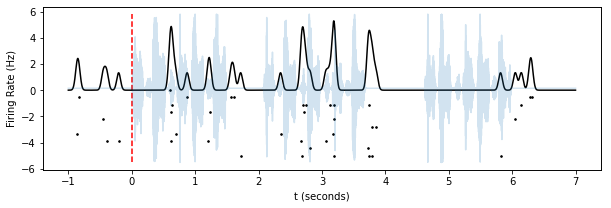

site         GreBla7410M_200116_174224
electrode                           27
unit                                25
Name: 31, dtype: object

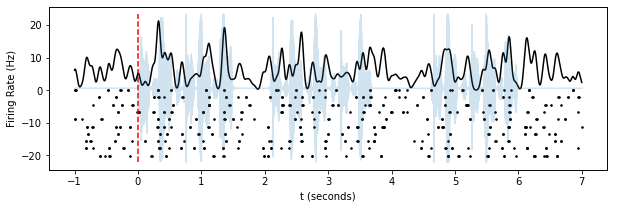

In [14]:
fig = plt.figure(figsize=(10, 3))
plot_kde_and_raster(row1)
plt.twinx()
plot_audio_overlay(row1)
plt.show()

fig = plt.figure(figsize=(10, 3))
plot_kde_and_raster(row2)
plt.twinx()
plot_audio_overlay(row2)
plt.show()

/auto/fhome/kevin/Projects/zebra-finch-memory-lesions/env/lib/python3.6/site-packages/soundsig/sound.py:554: RuntimeWarning: divide by zero encountered in log10
  plotSpect = 20*np.log10(plotSpect)


site         GreBla5671F_200117_172146
electrode                           11
unit                                 2
Name: 31, dtype: object

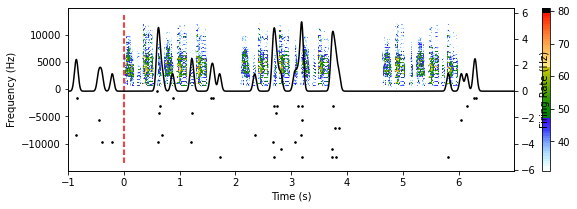

/auto/fhome/kevin/Projects/zebra-finch-memory-lesions/env/lib/python3.6/site-packages/soundsig/sound.py:554: RuntimeWarning: divide by zero encountered in log10
  plotSpect = 20*np.log10(plotSpect)


site         GreBla7410M_200116_174224
electrode                           27
unit                                25
Name: 31, dtype: object

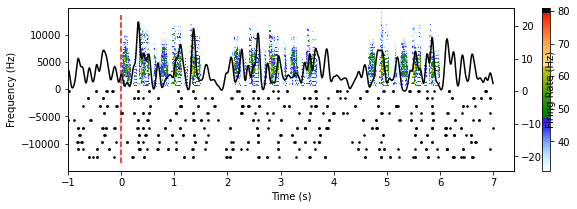

In [15]:
fig = plt.figure(figsize=(10, 3))
plot_spectrogram_overlay(row1)

# Hack to push the spectrogram into the top half
plt.ylim(-plt.ylim()[1], plt.ylim()[1])
plt.twinx()
plot_kde_and_raster(row1)
plt.show()

fig = plt.figure(figsize=(10, 3))
plot_spectrogram_overlay(row2)
plt.ylim(-plt.ylim()[1], plt.ylim()[1])
plt.twinx()
plot_kde_and_raster(row2)
plt.show()


## V. View all waveform shapes

For completeness, lets load all waveforms of the sorted units (not just the ones from trials with stimuli).

In [16]:
def plot_unit_waveforms(row, limit=1000):
    """Plot unit waveforms (skips so that only limit are plotted)"""
    
    display(row[["site", "electrode", "unit", "snr", "isi_violation_pct"]])
    wfs = load_unit_waveforms(row["unit_id"])
    plt.plot(wfs["spike_waveforms"][::(len(wfs["spike_waveforms"]) // limit) + 1].T, alpha=0.2)

site                 GreBla5671F_200117_172146
electrode                                   11
unit                                         2
snr                                    22.3045
isi_violation_pct                            0
Name: 31, dtype: object

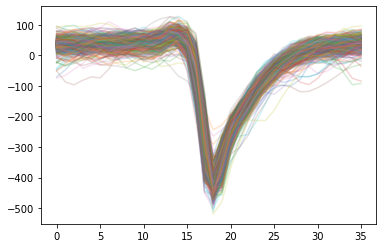

site                 GreBla7410M_200116_174224
electrode                                   27
unit                                        25
snr                                    19.1563
isi_violation_pct                            0
Name: 31, dtype: object

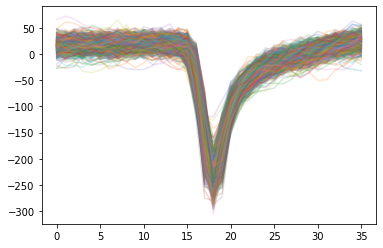

In [17]:
plot_unit_waveforms(row1)
plt.show()
plot_unit_waveforms(row2)
plt.show()